# THE FIRST MODEL
REALLY SUCKS BTW

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
batch_size = 128
img_height = 150
img_width = 150

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',)

In [7]:
data_dir = "Datasets"

train_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'training',
    shuffle=False,
)

val_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'validation',
    shuffle=False,
)

Found 956 images belonging to 10 classes.
Found 234 images belonging to 10 classes.


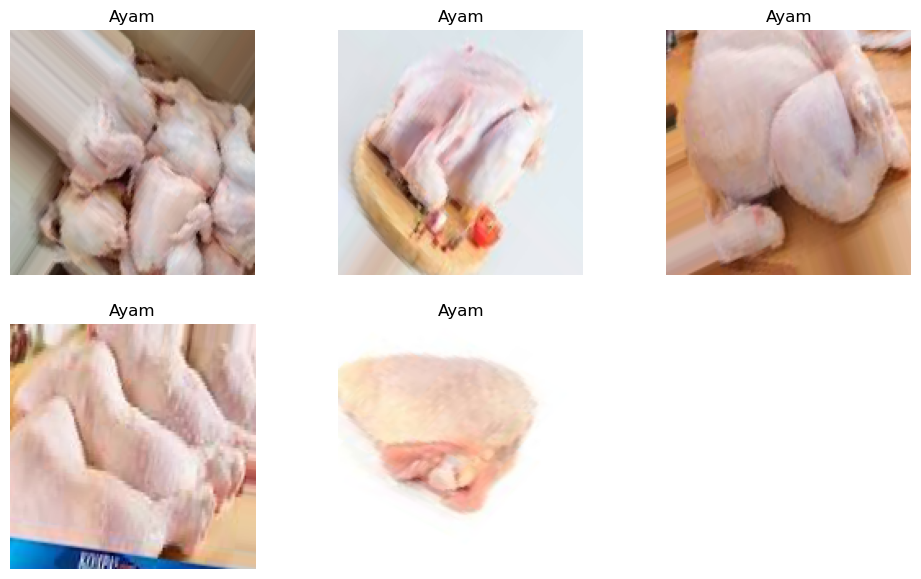

In [8]:
import numpy as np
n = 5
plt.figure(figsize=(12, 7))
x,y = train_ds.next()
for i in range(0,n):
    image_x = x[i,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    label= list(train_ds.class_indices)[np.where(y[0]==1)[0][0]]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [11]:
# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_2 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_3 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [12]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
model.fit(
        train_ds,
        steps_per_epoch=956 // batch_size,
        epochs=50,
        validation_data=val_ds,
        validation_steps=234 // batch_size)

Epoch 1/50
7/7 [==============================] - 15s 2s/step - loss: 2.3783 - accuracy: 0.0785 - val_loss: 2.3219 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 15s 2s/step - loss: 2.3170 - accuracy: 0.0531 - val_loss: 2.3117 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 15s 2s/step - loss: 2.3110 - accuracy: 0.1147 - val_loss: 2.3114 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 17s 2s/step - loss: 2.3113 - accuracy: 0.1099 - val_loss: 2.3440 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 18s 3s/step - loss: 2.3867 - accuracy: 0.0495 - val_loss: 2.3074 - val_accuracy: 0.1094
Epoch 6/50
7/7 [==============================] - 16s 2s/step - loss: 2.3073 - accuracy: 0.1171 - val_loss: 2.3087 - val_accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 15s 2s/step - loss: 2.3043 - accuracy: 0.1365 - val_loss: 2.3101 - val_accuracy: 0.0000e+00
Epoch 8/50

KeyboardInterrupt: 

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = training_datagen.flow(train_ds)
# test_generator = training_datagen.flow(test_ds)

# SECOND MODEL

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',)

In [28]:
data_dir = "Datasets"

train_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'training',
    shuffle=False,
)

val_ds = datagen.flow_from_directory(
	data_dir,
	target_size=(150,150),
	class_mode='categorical',
  	batch_size=128,
    subset = 'validation',
    shuffle=False,
)

Found 956 images belonging to 10 classes.
Found 234 images belonging to 10 classes.


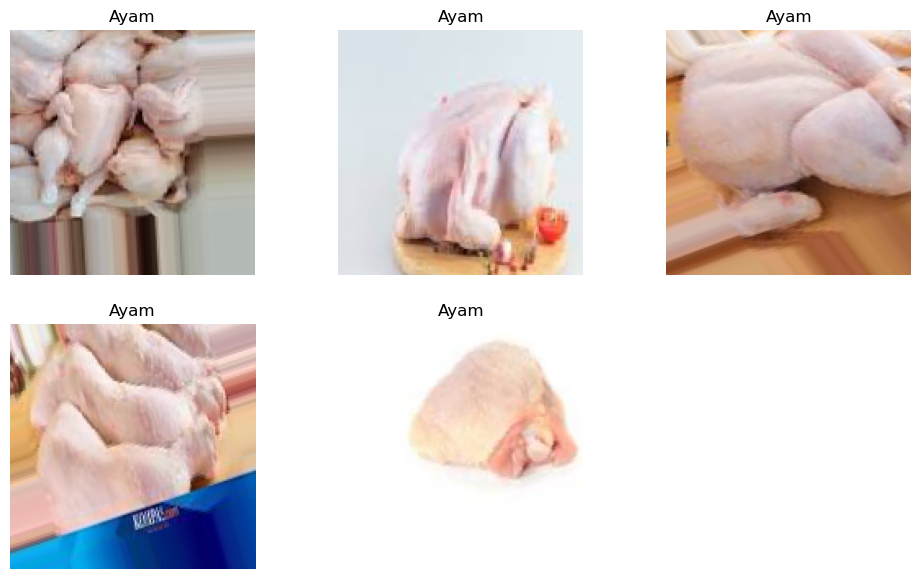

In [29]:
import numpy as np
n = 5
plt.figure(figsize=(12, 7))
x,y = train_ds.next()
for i in range(0,n):
    image_x = x[i,:,:,:]
    ax = plt.subplot(2, 3, i + 1)
    label= list(train_ds.class_indices)[np.where(y[0]==1)[0][0]]
    plt.title(label)
    plt.imshow(image_x)
    plt.axis("off")

In [31]:
IMG_SHAPE = (150,150, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 10s 1us/step


In [32]:
base_model.trainable = False

In [33]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10, activation="softmax")

In [37]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [40]:
validation_steps=20
initial_epochs = 100

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/100
8/8 [==============================] - 32s 4s/step - loss: 2.0491 - accuracy: 0.2960 - val_loss: 1.8835 - val_accuracy: 0.3718
Epoch 2/100
8/8 [==============================] - 30s 4s/step - loss: 2.0470 - accuracy: 0.2960 - val_loss: 1.9928 - val_accuracy: 0.2735
Epoch 3/100
8/8 [==============================] - 23s 3s/step - loss: 1.9763 - accuracy: 0.3190 - val_loss: 1.9212 - val_accuracy: 0.3718
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 1.9886 - accuracy: 0.3169 - val_loss: 1.8724 - val_accuracy: 0.3034
Epoch 5/100
8/8 [==============================] - 17s 2s/step - loss: 1.9318 - accuracy: 0.3337 - val_loss: 1.8743 - val_accuracy: 0.3376
Epoch 6/100
8/8 [==============================] - 17s 2s/step - loss: 1.9408 - accuracy: 0.3368 - val_loss: 1.8481 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 17s 2s/step - loss: 1.8531 - accuracy: 0.3672 - val_loss: 1.8244 - val_accuracy: 0.3932
Epoch 8/100
8/8 [==========

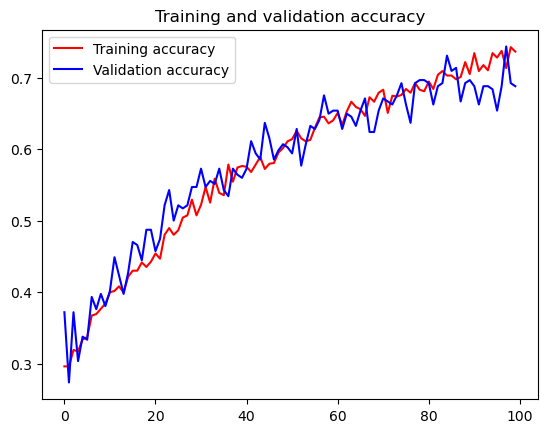

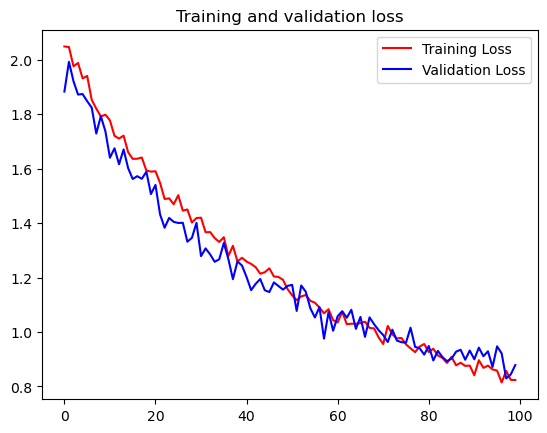

In [41]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
tf.saved_model.save(model,"ML/")

INFO:tensorflow:Assets written to: ML/assets


INFO:tensorflow:Assets written to: ML/assets
